# Interpolation Polynomiale

In [321]:
import numpy as np
import matplotlib.pyplot as plt 

## Interpolation par collocation
Le polynome $P(x)$ passe par tout les points : $P(x_j) = f_j \; \forall j \in [0, n]$
### a) Developement en puissance de x
$$
    \begin{bmatrix} 
        a_0 & a_1 x_0 &  a_2 x_0^2 & ... & a_n x_0^n \\ 
        a_0 & a_1 x_1 &            & ... & a_n x_1^n \\
         :  &         &            &     &           \\ 
        a_0 & a_1 x_n &            & ... & a_n xn^n 
    \end{bmatrix} = \begin{bmatrix} f_0\\ f_1\\ : \\ f_n  \end{bmatrix}
    \Leftrightarrow
    \begin{bmatrix} 
        1 & x_0 &  x_0^2 & ... & x_0^n \\ 
        1 & x_1 &        & ... & x_1^n \\
         :&     &        &     &       \\ 
        1 & x_n & x_n^2  & ... & xn^n 
    \end{bmatrix} 
    \begin{bmatrix} 
        a_0\\ a_1\\ : \\ a_n 
    \end{bmatrix} = \begin{bmatrix} f_0\\ f_1\\ : \\ f_n  \end{bmatrix}
$$

La matrice cree est de Vandermonde; $V_{i,j} = x_i^{j-1}$ 

Determinant dunne matrice caree de Vandermonde est apelle Vandermonde polynomial (ou Vandermonde determinant) $$\det (V) = \prod_{1\leq i <j \leq n}^{} (x_j-x_i) $$
$\det(V) \neq 0$ si et seulement si tout $x_i$ sont distincts

Le polynome interpole de $f(x)$ defini par $(n+1)$ points donne est de degree $\leq n $ et est UNIQUE si les x sont differentes 

### b) Forme polynomiale de Langrage

degre $\leq n$, tels que 
$$
L_i(x_j) = \delta_{ij} 
\left\{
	\begin{array}{l}
		=1 \;\textrm{si}\; j=i\\
		=0 \;\textrm{si}\: j\neq i
	\end{array}
\right.
$$

$L_i$ : polynome de Langrage(multiplicateur)

$$
L_i(x) = \frac{(x-x_0)(x-x_1)...(x-x_{i-1})(x-x_{i+1})...(x-x_n)}{(x_i-x_0)(x_i-x_1)...(x_i-x_{i-1})(x_i-x_{i+1})...(x_i-x_n)} = \prod_{j=0, j\neq i}^{n} \frac{(x-x_j)}{(x_i-x_j)}
$$
Atention $j \neq i$ car sinon on a une division par zero

Le polynome interpole de Langrage des $n+1$ points $(x_j, f_j)$ on ecrit:
$$ P_n(x) = \sum_{i=0}^n f_i L_i(x)$$
En effet on a:
$$P_n(x_j)=f_0L_0(x_j)+f_1L_1(x_j)+...+f_nL_n(x_j)=0+0+f_j+0...+0=f_j$$

In [322]:
def PolynomialTimesConstant(P, c): 
    """recomende de utiliser PolynomialTimesPolynomial avec seulement P, [s] a la place de ceci si on nest pas 100% sur qu c va rester une constante"""
    return [i*c for i in P]

assert(PolynomialTimesConstant([1,2,3], 3) == [3,6,9])
assert(PolynomialTimesConstant([1,2,3], 0) == [0,0,0])
assert(PolynomialTimesConstant([0,0,0], 0) == [0,0,0])
assert(PolynomialTimesConstant([], 0) == [])
assert(PolynomialTimesConstant([], 1) == [])

def PolynomialDivisionConstant(P, c): 
    """Precondition: c != 0"""
    return PolynomialTimesConstant(P, 1/c)

assert(PolynomialDivisionConstant([3,6,9], 3) == [1,2,3])

def PolynomialTimesPolynomial(P1, P2):
    new_P = [0 for i in range(max(len(P1),len(P2)) + 1)] # multiplication de deux polynomale peux resulter maximum a un polynome de degree de leur somme 
    for i in range(len(P1)):
        for j in range(len(P2)):
            new_P[i+j] += P1[i] * P2[j]
    # TODO not sure if i should take the 0s off or not 
    while len(new_P) and new_P[-1] == 0:
        new_P.pop()
    return new_P 

assert(PolynomialTimesPolynomial([1, 2, 3, 4], [1,1]) == [1, 3, 5, 7, 4])
assert(PolynomialTimesPolynomial([2], [1,1]) == [2,2])
assert(PolynomialTimesPolynomial([2], [1,1, 0 , 0]) == [2,2])
assert(PolynomialTimesPolynomial([0, 2], [1,1, 0 , 0]) == [0, 2,2])

# def PolynomialDivisionPolynomial(P1, P2):
#     # TODO faire long division https://en.wikipedia.org/wiki/Polynomial_long_division pour au futur si on a besoin de diviser des polynomes 
#     print("Pas pret pour fonctionement!!!!")
#     new_P = [0 for i in range(len(P1)+len(P2))] # multiplication de deux polynomale peux resulter maximum a un polynome de degree de leur somme 
#     for i in range(len(P1)):
#         for j in range(len(P2)):
#             new_P[i+j] += P1[i] / P2[j]
#     return new_P # TODO faire de tel sort que on enleve les zeroz a la fin

In [323]:
def PolynomialAdition(P1, P2):
    # TODO ici je suis pas sur si cest la meilleur moyen de faire pour determiner le plus gand et petit degree polynomiale
    # Peut etre les parcourir en meme temps et les append a la liste ?
    big_P = []
    small_P = []
    if len(P1) > len(P2): 
        big_P = P1
        small_P = P2
    else: 
        big_P = P2 
        small_P = P1
        
    new_P = [i for i in big_P]
    for i in range(len(small_P)):
        new_P[i] += small_P[i]
    return new_P # TODO faire de tel sort que on enleve les zeroz a la fin

def PolynomialSubstraction(P1, P2):
    """returns P1 - P2
       multiplies P2 by -1 then adds them together""" # TODO not sure if it is optimal or not
    return PolynomialAdition(P1, PolynomialTimesConstant(P2, -1))

def LangragePolynomial(data, degree = -1):
    """:param data :is an array of tuples with (x,f(x))
       :param degree: the degree which we want to approach (n)
       TODO returns a list of constants before the x^n ex: [1, 3 , 2, 0, 5] => 1x^0 + 3x^1 + 2x^2 + 0*x^3 + 5*x^4 """
    if degree == -1: degree = len(data)
    
    #  TODO x f(x) here can only be constants maybe change them with polynomial multiplication ???
    #  Comme pour linstant on a pas la fonctionalite de division on les stock apart et a la fin on les mets ensemble
    L_up   = [[1]]* (degree + 1) # on fait degree + 1 car dans les listes on prends on compte la constante aussi
    L_down = [1]  * (degree + 1) 
    L      = [[]] * (degree + 1) 
    P      = [0]  * (degree + 1) 
    for i in range(degree):
        for j in range(degree):
            if i == j:
                continue
            L_up[i]    = PolynomialTimesPolynomial(L_up[i], [-data[j][0], 1])
            L_down[i] *= (data[i][0]-data[j][0])                                    # here all data x are constants atention  
        L[i] = PolynomialDivisionConstant(L_up[i], L_down[i])                       # Atention here we assume that all x_i - x_j  are constants
        P    = PolynomialAdition(P, PolynomialTimesConstant( L[i] , data[i][1]))      
    while P[-1] == 0:
        P.pop()
    return P

# TODO take off the zeros 
def ListToFunction(L, x):
    if len(L) == 0:
        return 0
    tot = L[0]
    for i in range(1, len(L)):
        tot += L[i] * (x)**i
    return tot

def ListToStr(L):
    if len(L) == 0:
        return 0
    s = "" + str(L[0])
    for i in range(1, len(L)):
        if L[i] < 0 : s +=  "{:.2f}x^{}".format(L[i], i)
        else :        s += "+{:.2f}x^{}".format(L[i], i) #si cest plus grand que 0 le + ca sajoute pas automatiquement donc il faut l'ajouter
    return s
    

# QUESTION: Pourquoi le polynome de langrange narive pas a trouver les equations constantes comme $y = x^2$ ???
Ou peut etre cest moi qui a pas bien fait ? Mais alors comment on exlique que ca marche pour des nombres petit ?

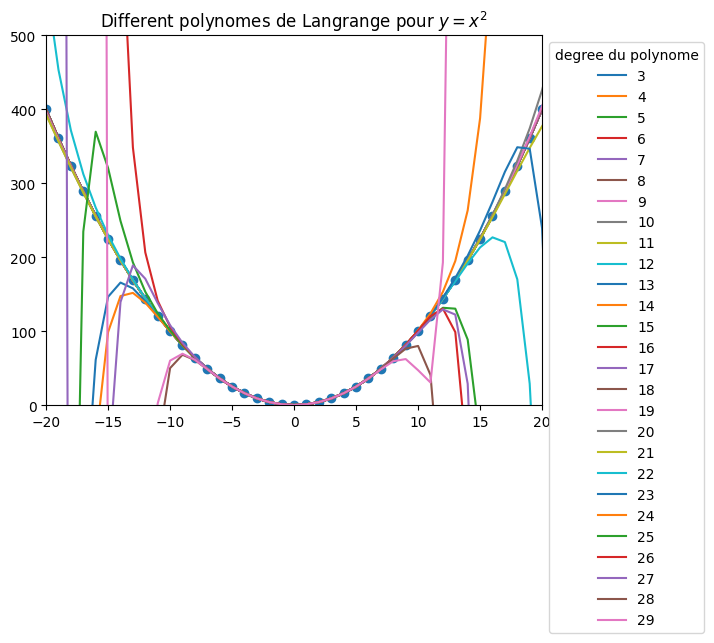

In [324]:
data = [(i, i*i) for i in range(-30, 30)]
# print(P)
x = [i[0] for i in data]
plt.scatter(x, [i*i for i in x])
for j in range(3, 30):
    data = [(i, i*i) for i in range(0,j)]
    P = LangragePolynomial(data)
    y = [ListToFunction(P, i) for i in x]
    plt.plot(x, y, label = str(j))
plt.ylim(0, 500)
plt.xlim(-20, 20)
plt.legend(bbox_to_anchor=(1.0, 1.0), loc='upper left', title = "degree du polynome")
plt.title("Different polynomes de Langrange pour $y=x^2$")
plt.show()
plt.close()

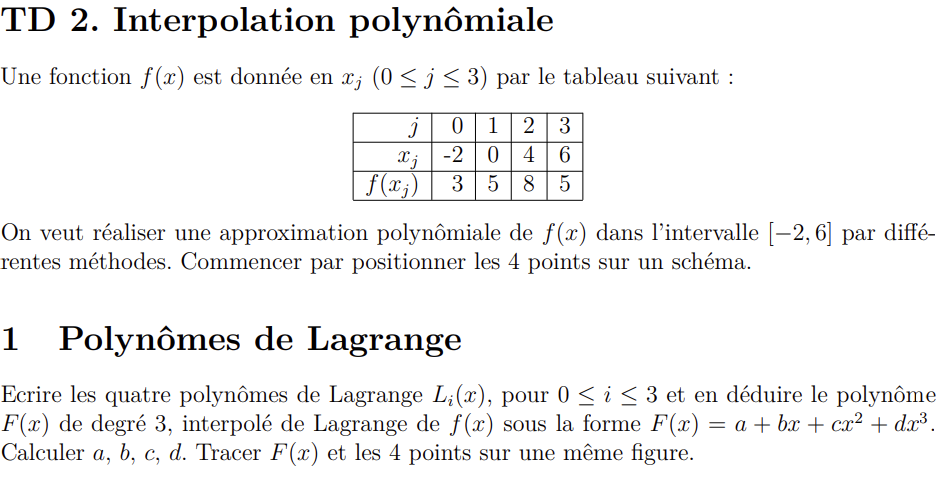

$$
L_i(x) = \frac{(x-x_0)(x-x_1)...(x-x_{i-1})(x-x_{i+1})...(x-x_n)}{(x_i-x_0)(x_i-x_1)...(x_i-x_{i-1})(x_i-x_{i+1})...(x_i-x_n)} = \prod_{j=0, j\neq i}^{n} \frac{(x-x_j)}{(x_i-x_j)}
$$
Atention $j \neq i$ car sinon on a une division par zero

Le polynome interpole de Langrage des $n+1$ points $(x_j, f_j)$ on ecrit:
$$ P_n(x) = \sum_{i=0}^n f_i L_i(x)$$

$$
L_0(x) = \frac{(x)(x-4)(x-6)}{(-2)(-2-4)(-2-6)} = \frac{(x^2-4x)(x-6)}{(-2)(-6)(-8)}=\frac{x^3-6x^2-4x^2+24x}{-96}=\frac{24x-10x^2+x^3}{-96}
$$
$$
L_1(x) = \frac{(x+2)(x-4)(x-6)}{(2)(-4)(-6)}=\frac{(x^2-4x+2x-8)(x-6)}{48}=\frac{(x^2-2x-8)(x-6)}{48}=\frac{x^3-6x^2-2x^2+12x-8x+48}{48}=\frac{48+4x-8x^2+x^3}{48}
$$
$$
L_2(x) = \frac{(x+2)(x)(x-6)}{(4-(-2))(4)(4-6)}=\frac{(x+2)(x^2-6x)}{(6)(-8)}=\frac{x^3-6x^2+2x^2-12x}{-48}=\frac{-12x-4x^2+x^3}{-48}
$$
$$
L_3(x) = \frac{(x+2)(x)(x-4)}{(6-(-2))(6-0)(6-4)}=\frac{(x^2+2x)(x-4)}{(48)(2)}=\frac{x^3-4x^2+2x^2-8x}{96}=\frac{-8x-2x^2+x^3}{96} 
$$
<!--
$$
\Rightarrow F(x) = 3L_0(x)+5L_1(x)+8L_2(x)+5L_3(x) = \frac{24x-10x^2+x^3}{-32}+ 5\frac{x^3-8x^2+4x+48}{48}+ \frac{-12x-4x^2+x^3}{-6} + 5\frac{-8x-2x^2+x^3}{96} \\
$$
$$
\Rightarrow F(x) = -3\frac{24x-10x^2+x^3}{96}+ 10\frac{x^3-8x^2+4x+48}{96}- 16\frac{-12x-4x^2+x^3}{96} + 5\frac{-8x-2x^2+x^3}{96}\\
$$
$$
\Rightarrow F(x) = \frac{-72x+30x^2-3x^3+10x^3-80x^2+40x+480+12\cdot 16x+64x^2-16x^3-40x-10x^2+5x^3}{96} 
$$
-->
$$
\Rightarrow F(x) = \frac{480 -72x +40x + 192x-40x + 30x^2 -80x^2 + 64x^2 -10x^2 -3x^3 + 10x^3-16x^3+5x^3}{96} = \frac{480 + 120x + 4x^2 -4x^3}{96} 
$$ 
$$ 
\Rightarrow F(x) = 5 + \frac{5}{4}x + \frac{1}{24}x^2 -\frac{1}{24} x^3
$$

[5.0, 1.25, 0.04166666666666671, -0.04166666666666667]


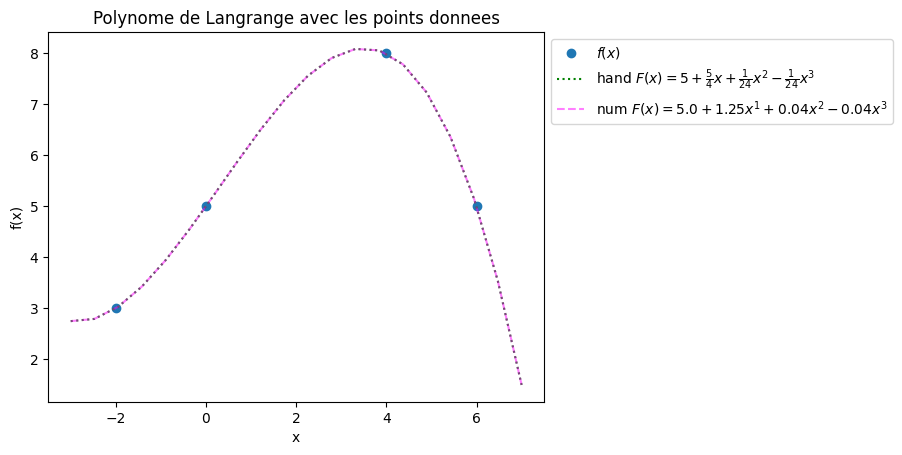

In [325]:
def MyPolynomeDeLangrangeF_x(x):
    return 5 + 5*x/4 + x*x/24 - x*x*x/24

data = [(-2, 3), (0, 5), (4,8), (6, 5)]
x  = [i[0] for i in data ]
fx = [i[1] for i in data ]
plt.scatter(x, fx, label = "$f(x)$")

test_x = np.linspace(-3, 7, 20)
plt.plot(test_x, MyPolynomeDeLangrangeF_x(test_x), alpha= 1, color = "green", label = "hand " + r"$F(x) = 5 + \frac{5}{4}x + \frac{1}{24}x^2 -\frac{1}{24} x^3 $", linestyle = ":")

num_cal_L = LangragePolynomial(data, len(data))
print(num_cal_L)
plt.plot(test_x, ListToFunction(num_cal_L, test_x), alpha = 0.5, color = "magenta", label = "num $F(x) = " + ListToStr(num_cal_L) + "$", linestyle = "--")

plt.xlabel('x')
plt.ylabel("f(x)")
plt.title("Polynome de Langrange avec les points donnees")
plt.legend(bbox_to_anchor=(1.0, 1.0), loc='upper left')
plt.show()
plt.close()